In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt 


# load the data
def load_data():
    path_list = []
    cwd = Path(os.getcwd())
    print(f'Working Dir: {cwd}')
    data_path = os.path.join(cwd.parent, 'Data')

    print(f'Path: {data_path}')
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                path_list.append(file_path)
    return path_list


path_list = load_data()

Working Dir: d:\Dokumente\MoinCC-AI4metabolomics\00_Data_Impression
Path: d:\Dokumente\MoinCC-AI4metabolomics\Data


(1503, 132)
(2004, 132)
(1796, 102)
(1583, 132)
(1796, 102)
(877, 41)
(841, 42)
(447, 52)
(1675, 132)
(1714, 132)
(1714, 132)
(1632, 132)
(1279, 132)
(1583, 132)
(1478, 132)
(1074, 132)
(1632, 132)
(654, 52)
(778, 52)
(908, 52)
(632, 52)
(620, 52)
(622, 52)
(637, 52)
(628, 52)
(1297, 132)
(1429, 132)
(1594, 132)
(823, 132)
(705, 132)
(855, 132)
(735, 132)
(1226, 132)
(960, 132)
(1913, 132)
(1913, 132)
(755, 132)
(778, 132)
(1902, 132)
(1045, 132)
(653, 132)
(695, 132)
(799, 132)
(880, 132)
(922, 132)


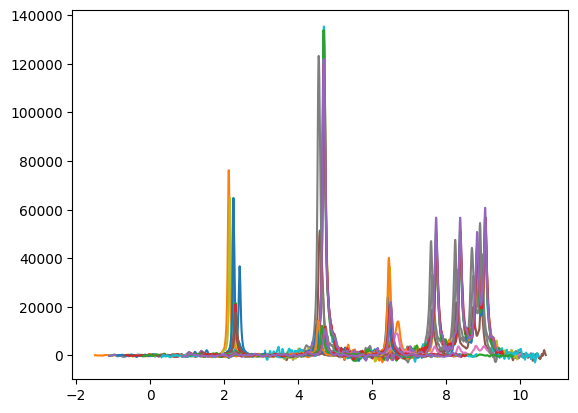

In [311]:
for i in range(len(path_list)):
    df = pd.read_csv(path_list[i])
    df['sum'] = df.iloc[:,1:].sum(axis=1)

    x = df.iloc[:,0]
    y = df.iloc[:, 1]

    print(df.shape)

    plt.plot(x,y)


plt.show()

In [316]:
df.iloc[:,1].shape

(922,)

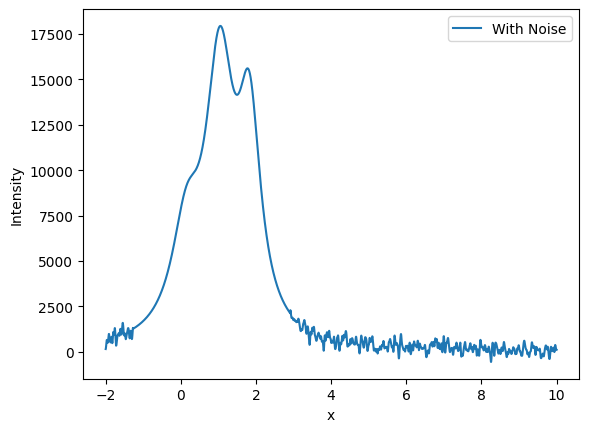

In [310]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Lorentzian function
def lorentzian(x, x0, gamma, height):
    return height * (gamma**2 / ((x - x0)**2 + gamma**2))


def generate_random_spectrum(peak_list):
    # Generate random spectrum with Lorentzian peaks
    x = np.linspace(-2, 10, 10000)  # x range
    y = np.zeros_like(x)          # initialize y as zeros
    mask = np.zeros_like(x)       # mask to identify peak regions

    # Add random Lorentzian peaks
    #np.random.seed(0)
    peak_list = [2.323, 4.7, 1.201]

    for peak_pos in range(len(peak_list)):
        x0 = peak_pos + np.random.uniform(-0.2, 0.2)
        gamma = np.random.uniform(0.1, 0.5)  # Random width (gamma)
        height = np.random.uniform(5000, 20000)  # Random height
        peak = lorentzian(x, x0, gamma, height)
        y += peak

        # Create a mask to identify regions near the peaks (exclude noise here)
        mask += peak > (0.1 * height)  # Masking regions where peak height is significant

    # Add noise only outside the peak regions
    #noise = np.random.normal(0, 500, size=x.shape)  # Adjust noise level as needed
    random_noise_level = np.random.uniform(100, 5000)
    noise = np.random.normal(10, random_noise_level, 10000)
    # smooth the noise with gaussian filter
    noise = gaussian_filter1d(noise, 10)
        
    y_noisy = y + noise * (mask == 0)  # Add noise only where mask is 0 (outside peaks)

    return x, y_noisy

# Plot the result
plt.plot(x, y_noisy, label="With Noise")
#plt.plot(x, y, label="Original Peaks", alpha=0.7)
plt.xlabel('x')
plt.ylabel('Intensity')
plt.legend()
plt.show()
